<a href="https://colab.research.google.com/github/raushan-k15/Amazon_Clone/blob/main/4th_Year_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import models

import numpy as np

import matplotlib.pyplot as plt

import random

from PIL import Image

from PIL import ImageEnhance

import pandas as pd

from keras.preprocessing.image import load_img

from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.layers import Input

from tensorflow.keras.layers import Flatten

from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import Dense

from tensorflow.keras.optimizers import Adamax

from tensorflow.keras.metrics import Recall

from tensorflow.keras.metrics import Precision

from sklearn.metrics import accuracy_score

from tensorflow.keras.applications import VGG19

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

from sklearn.utils import shuffle

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report


In [ ]:
import os  # For directory and file operations
import numpy as np  # For numerical operations and handling image arrays
import random  # For generating random values for augmentation
from PIL import Image, ImageEnhance  # For image processing and enhancement
import pandas as pd


#keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img  # For loading images
from tensorflow.keras.models import Sequential  # For building the model
from tensorflow.keras.layers import Input, Flatten, Dropout, Dense  # For model layers
from tensorflow.keras.optimizers import Adamax  # For optimizer
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.applications import VGG16  # For using VGG16 model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle  # For shuffling the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#Load Datasets


In [ ]:
training_dr = '/content/drive/MyDrive/Colab Notebooks/training'
testing_dr = '/content/drive/My Drive/Colab Notebooks/testing'

training_paths = []
training_labels =[]

for label in os.listdir(training_dr):
    for image in os.listdir(os.path.join(training_dr, label)):
        training_paths.append(os.path.join(training_dr, label, image))
        training_labels.append(label)
        training_paths, training_labels = shuffle(training_paths, training_labels)

testing_paths=[]
testing_labels=[]
for label in os.listdir(testing_dr):
    for image in os.listdir(os.path.join(testing_dr, label)):
        testing_paths.append(os.path.join(testing_dr, label, image))
        testing_labels.append(label)
        testing_paths, testing_labels = shuffle(testing_paths, testing_labels)

train_df = pd.DataFrame({'ClassPath' : training_paths, 'Class' : training_labels})
test_df = pd.DataFrame({'ClassPath' : testing_paths, 'Class' : testing_labels})

valid_df, ts_df = train_test_split(test_df, train_size=0.5,random_state=20,stratify=test_df['Class'])

#Data Visualization


Found 5820 validated image filenames belonging to 4 classes.
Found 665 validated image filenames belonging to 4 classes.
Found 666 validated image filenames belonging to 4 classes.


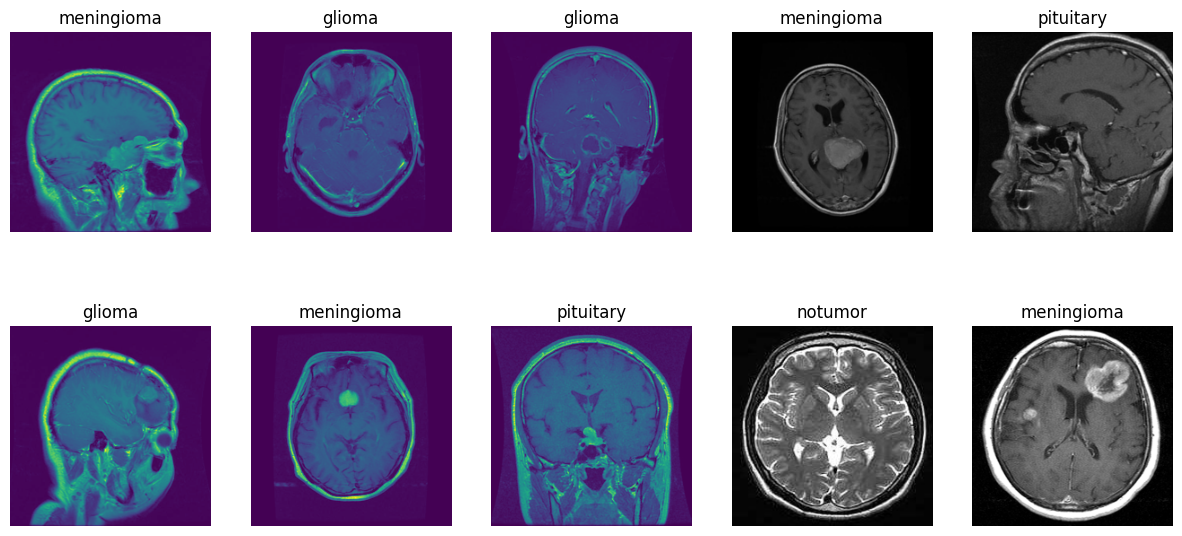

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

import random

from PIL import Image

import os

import numpy as np
import matplotlib.pyplot as plt

random_indices = random.sample(range(len(training_paths)),10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7))
axes = axes.ravel()
for i, index in enumerate(random_indices):
    img = Image.open(training_paths[index])
    img = img.resize((224, 224))
    axes[i].imshow(img)
    axes[i].set_title(training_labels[index])
    axes[i].axis('off')

batch_size = 32
img_size = (299,299)
_gen = ImageDataGenerator(rescale = 1./255 , brightness_range = (0.8,1.2))
ts_gen = ImageDataGenerator(rescale = 1./255)
# Use flow_from_dataframe instead of flowfrom_dataframe
tr_gen = _gen.flow_from_dataframe(train_df,x_col='ClassPath',y_col='Class',target_size=img_size,class_mode='categorical',batch_size=batch_size,shuffle=True)
valid_gen = _gen.flow_from_dataframe(valid_df,x_col='ClassPath',y_col='Class',target_size=img_size,class_mode='categorical',batch_size=batch_size,shuffle=False)
ts_gen = ts_gen.flow_from_dataframe(ts_df,x_col='ClassPath',y_col='Class',target_size=img_size,class_mode='categorical',batch_size=batch_size,shuffle=False)


In [ ]:
batch_size = 32
img_size = (299,299)
_gen = ImageDataGenerator(rescale = 1./255 , brightness_range = (0.8,1.2))
ts_gen = ImageDataGenerator(rescale = 1./255)
# Use flow_from_dataframe instead of flowfrom_dataframe
tr_gen = _gen.flow_from_dataframe(train_df,x_col='ClassPath',y_col='Class',target_size=img_size,class_mode='categorical',batch_size=batch_size,shuffle=True)
valid_gen = _gen.flow_from_dataframe(valid_df,x_col='ClassPath',y_col='Class',target_size=img_size,class_mode='categorical',batch_size=batch_size,shuffle=False)
ts_gen = ts_gen.flow_from_dataframe(ts_df,x_col='ClassPath',y_col='Class',target_size=img_size,class_mode='categorical',batch_size=batch_size,shuffle=False)

Found 5820 validated image filenames belonging to 4 classes.
Found 665 validated image filenames belonging to 4 classes.
Found 666 validated image filenames belonging to 4 classes.


In [ ]:
img_shape = (299,299,3)
base_model = tf.keras.applications.Xception(include_top=False,weights='imagenet',input_shape=img_shape, pooling = 'max')

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
model = Sequential([
                    base_model,
                    Flatten(),
                    Dropout(rate = 0.3),
                    Dense(128, activation = 'relu'),
                    Dropout(rate = 0.25),
                    Dense(4, activation = 'softmax'),
                    ])

In [ ]:
model.compile(Adamax(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy',Recall(),Precision()])

#MODEL:


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint


checkpoint_path = "/content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_{epoch:02d}.weights.h5"


checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=False,
    verbose=1
)

history = model.fit(
    tr_gen,
    epochs=10,
    validation_data=valid_gen,
    shuffle=False,
    callbacks=[checkpoint_callback]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.6941 - loss: 0.9113 - precision: 0.8054 - recall: 0.5536 
Epoch 1: saving model to /content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_01.weights.h5
182/182 ━━━━━━━━━━━━━━━━━━━━ 4014s 22s/step - accuracy: 0.6949 - loss: 0.9088 - precision: 0.8060 - recall: 0.5548 - val_accuracy: 0.9383 - val_loss: 0.1739 - val_precision: 0.9474 - val_recall: 0.9203
Epoch 2/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 929ms/step - accuracy: 0.9786 - loss: 0.0798 - precision: 0.9800 - recall: 0.9754
Epoch 2: saving model to /content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_02.weights.h5
182/182 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0.9786 - loss: 0.0798 - precision: 0.9800 - recall: 0.9754 - val_accuracy: 0.9774 - val_loss: 0.0727 - val_precision: 0.9774 - val_recall: 0.9759
Epoch 3/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 929ms/step - accuracy: 0.9936 - loss: 0.0196 - precision: 0.9943 - recall: 0.9935
Epoch 3: s

In [ ]:
from tensorflow.keras.models import load_model

# Assuming you want to load the weights from epoch 10
epoch_number = 1
checkpoint_path = f"/content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_{epoch_number:02d}.weights.h5"

# Load the weights into the model
model.load_weights(checkpoint_path)

# Now you can use the model with the loaded weights for evaluation or prediction
# For example, to evaluate on the test set:
test_score = model.evaluate(ts_gen, verbose=1)
print(f"Test Loss after loading epoch {epoch_number}: {test_score[0]:.4f}")
print(f"Test Accuracy after loading epoch {epoch_number}: {test_score[1]*100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adamax', because it has 2 variables whereas the saved optimizer has 318 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 494s 24s/step - accuracy: 0.9378 - loss: 0.1735 - precision: 0.9426 - recall: 0.9238
Test Loss after loading epoch 1: 0.1748
Test Accuracy after loading epoch 1: 93.84%


In [ ]:
from tensorflow.keras.models import load_model

# Assuming you want to load the weights from epoch 10
epoch_number = 2
checkpoint_path = f"/content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_{epoch_number:02d}.weights.h5"

# Load the weights into the model
model.load_weights(checkpoint_path)

# Now you can use the model with the loaded weights for evaluation or prediction
# For example, to evaluate on the test set:
test_score = model.evaluate(ts_gen, verbose=1)
print(f"Test Loss after loading epoch {epoch_number}: {test_score[0]:.4f}")
print(f"Test Accuracy after loading epoch {epoch_number}: {test_score[1]*100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 263ms/step - accuracy: 0.9845 - loss: 0.0415 - precision: 0.9844 - recall: 0.9827
Test Loss after loading epoch 2: 0.0556
Test Accuracy after loading epoch 2: 97.75%


In [ ]:
from tensorflow.keras.models import load_model

# Assuming you want to load the weights from epoch 10
epoch_number = 3
checkpoint_path = f"/content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_{epoch_number:02d}.weights.h5"

# Load the weights into the model
model.load_weights(checkpoint_path)

# Now you can use the model with the loaded weights for evaluation or prediction
# For example, to evaluate on the test set:
test_score = model.evaluate(ts_gen, verbose=1)
print(f"Test Loss after loading epoch {epoch_number}: {test_score[0]:.4f}")
print(f"Test Accuracy after loading epoch {epoch_number}: {test_score[1]*100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 266ms/step - accuracy: 0.9711 - loss: 0.1014 - precision: 0.9715 - recall: 0.9696
Test Loss after loading epoch 3: 0.0921
Test Accuracy after loading epoch 3: 97.30%


In [ ]:
from tensorflow.keras.models import load_model

# Assuming you want to load the weights from epoch 10
epoch_number = 4
checkpoint_path = f"/content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_{epoch_number:02d}.weights.h5"

# Load the weights into the model
model.load_weights(checkpoint_path)

# Now you can use the model with the loaded weights for evaluation or prediction
# For example, to evaluate on the test set:
test_score = model.evaluate(ts_gen, verbose=1)
print(f"Test Loss after loading epoch {epoch_number}: {test_score[0]:.4f}")
print(f"Test Accuracy after loading epoch {epoch_number}: {test_score[1]*100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 247ms/step - accuracy: 0.9933 - loss: 0.0260 - precision: 0.9933 - recall: 0.9933
Test Loss after loading epoch 4: 0.0316
Test Accuracy after loading epoch 4: 98.95%


In [ ]:
from tensorflow.keras.models import load_model

# Assuming you want to load the weights from epoch 10
epoch_number = 5
checkpoint_path = f"/content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_{epoch_number:02d}.weights.h5"

# Load the weights into the model
model.load_weights(checkpoint_path)

# Now you can use the model with the loaded weights for evaluation or prediction
# For example, to evaluate on the test set:
test_score = model.evaluate(ts_gen, verbose=1)
print(f"Test Loss after loading epoch {epoch_number}: {test_score[0]:.4f}")
print(f"Test Accuracy after loading epoch {epoch_number}: {test_score[1]*100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 246ms/step - accuracy: 0.9908 - loss: 0.0143 - precision: 0.9908 - recall: 0.9908
Test Loss after loading epoch 5: 0.0177
Test Accuracy after loading epoch 5: 99.10%


In [ ]:
from tensorflow.keras.models import load_model

# Assuming you want to load the weights from epoch 10
epoch_number = 6
checkpoint_path = f"/content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_{epoch_number:02d}.weights.h5"

# Load the weights into the model
model.load_weights(checkpoint_path)

# Now you can use the model with the loaded weights for evaluation or prediction
# For example, to evaluate on the test set:
test_score = model.evaluate(ts_gen, verbose=1)
print(f"Test Loss after loading epoch {epoch_number}: {test_score[0]:.4f}")
print(f"Test Accuracy after loading epoch {epoch_number}: {test_score[1]*100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.9836 - loss: 0.0577 - precision: 0.9836 - recall: 0.9836
Test Loss after loading epoch 6: 0.0507
Test Accuracy after loading epoch 6: 98.50%


In [ ]:
from tensorflow.keras.models import load_model

# Assuming you want to load the weights from epoch 10
epoch_number = 7
checkpoint_path = f"/content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_{epoch_number:02d}.weights.h5"

# Load the weights into the model
model.load_weights(checkpoint_path)

# Now you can use the model with the loaded weights for evaluation or prediction
# For example, to evaluate on the test set:
test_score = model.evaluate(ts_gen, verbose=1)
print(f"Test Loss after loading epoch {epoch_number}: {test_score[0]:.4f}")
print(f"Test Accuracy after loading epoch {epoch_number}: {test_score[1]*100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step - accuracy: 0.9965 - loss: 0.0104 - precision: 0.9965 - recall: 0.9965
Test Loss after loading epoch 7: 0.0070
Test Accuracy after loading epoch 7: 99.70%


In [ ]:
from tensorflow.keras.models import load_model

# Assuming you want to load the weights from epoch 10
epoch_number = 8
checkpoint_path = f"/content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_{epoch_number:02d}.weights.h5"

# Load the weights into the model
model.load_weights(checkpoint_path)

# Now you can use the model with the loaded weights for evaluation or prediction
# For example, to evaluate on the test set:
test_score = model.evaluate(ts_gen, verbose=1)
print(f"Test Loss after loading epoch {epoch_number}: {test_score[0]:.4f}")
print(f"Test Accuracy after loading epoch {epoch_number}: {test_score[1]*100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 249ms/step - accuracy: 0.9963 - loss: 0.0165 - precision: 0.9963 - recall: 0.9963
Test Loss after loading epoch 8: 0.0143
Test Accuracy after loading epoch 8: 99.70%


In [ ]:
from tensorflow.keras.models import load_model

# Assuming you want to load the weights from epoch 10
epoch_number = 9
checkpoint_path = f"/content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_{epoch_number:02d}.weights.h5"

# Load the weights into the model
model.load_weights(checkpoint_path)

# Now you can use the model with the loaded weights for evaluation or prediction
# For example, to evaluate on the test set:
test_score = model.evaluate(ts_gen, verbose=1)
print(f"Test Loss after loading epoch {epoch_number}: {test_score[0]:.4f}")
print(f"Test Accuracy after loading epoch {epoch_number}: {test_score[1]*100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.9726 - loss: 0.1131 - precision: 0.9726 - recall: 0.9726
Test Loss after loading epoch 9: 0.1097
Test Accuracy after loading epoch 9: 97.75%


In [ ]:
from tensorflow.keras.models import load_model

# Assuming you want to load the weights from epoch 10
epoch_number = 10
checkpoint_path = f"/content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_{epoch_number:02d}.weights.h5"

# Load the weights into the model
model.load_weights(checkpoint_path)

# Now you can use the model with the loaded weights for evaluation or prediction
# For example, to evaluate on the test set:
test_score = model.evaluate(ts_gen, verbose=1)
print(f"Test Loss after loading epoch {epoch_number}: {test_score[0]:.4f}")
print(f"Test Accuracy after loading epoch {epoch_number}: {test_score[1]*100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 247ms/step - accuracy: 0.9911 - loss: 0.0481 - precision: 0.9911 - recall: 0.9911
Test Loss after loading epoch 10: 0.0412
Test Accuracy after loading epoch 10: 99.10%


In [ ]:
# Save the history object after training
import pickle

with open('history.pkl', 'wb') as f:
    pickle.dump(history, f)

NameError: name 'history' is not defined

In [ ]:
# This cell should be executed immediately after the model.fit cell
# Save the history object after training
import pickle

# Optional: Add a check to see if history is defined before saving
if 'history' in locals() or 'history' in globals():
    print("History object is defined. Saving...")
    with open('history.pkl', 'wb') as f:
        pickle.dump(history, f)
    print("History object saved successfully.")
else:
    print("Error: history object is not defined. Ensure the model.fit cell was executed.")

Error: history object is not defined. Ensure the model.fit cell was executed.


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('my_model.keras')

ValueError: File not found: filepath=my_model.keras. Please ensure the file is an accessible `.keras` zip file.

#Train and Val Plots


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract metrics from history
metrics = {
    'Loss': (history.history['loss'], history.history['val_loss']),
    'Accuracy': (history.history['accuracy'], history.history['val_accuracy']),
    'Precision': (history.history['precision'], history.history['val_precision']),
    'Recall': (history.history['recall'], history.history['val_recall'])
}

# Find best epochs
best_epochs = {
    'Loss': np.argmin(metrics['Loss'][1]) + 1,
    'Accuracy': np.argmax(metrics['Accuracy'][1]) + 1,
    'Precision': np.argmax(metrics['Precision'][1]) + 1,
    'Recall': np.argmax(metrics['Recall'][1]) + 1
}

# Plot settings
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')
Epochs = range(1, len(metrics['Loss'][0]) + 1)

# Plot metrics
for i, (metric, (tr, val)) in enumerate(metrics.items(), 1):
    plt.subplot(2, 2, i)
    plt.plot(Epochs, tr, 'r', label=f'Training {metric}')
    plt.plot(Epochs, val, 'g', label=f'Validation {metric}')
    best_epoch = best_epochs[metric]
    best_value = val[best_epoch - 1]
    plt.scatter(best_epoch, best_value, s=100, c='blue', label=f'Best epoch = {best_epoch}')
    plt.title(f'Training and Validation {metric}')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

NameError: name 'history' is not defined

In [ ]:
import pickle

with open('history.pkl', 'rb') as f:
    history = pickle.load(f)


#Model Classification Report


In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

182/182 ━━━━━━━━━━━━━━━━━━━━ 54s 294ms/step - accuracy: 0.9983 - loss: 0.0036 - precision: 0.9991 - recall: 0.9983
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 296ms/step - accuracy: 0.9950 - loss: 0.0139 - precision: 0.9950 - recall: 0.9950


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 429s 21s/step - accuracy: 0.9862 - loss: 0.0659 - precision: 0.9862 - recall: 0.9862
Train Loss: 0.0031
Train Accuracy: 99.88%
--------------------
Validation Loss: 0.0142
Validation Accuracy: 99.40%
--------------------
Test Loss: 0.0691
Test Accuracy: 98.50%


In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 384ms/step


In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       150
           1       0.94      1.00      0.97       153
           2       1.00      1.00      1.00       208
           3       1.00      0.99      0.99       155

    accuracy                           0.98       666
   macro avg       0.98      0.98      0.98       666
weighted avg       0.99      0.98      0.99       666



#Model Confusion Plot


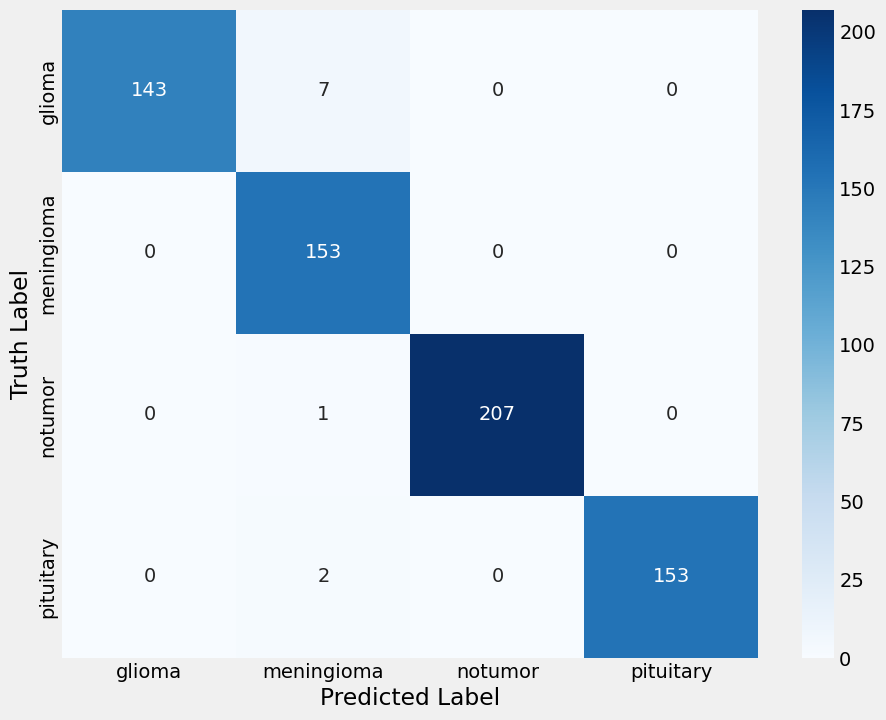

In [ ]:
class_dict = tr_gen.class_indices
conf_matrix = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

#Save & Load Model


In [ ]:
# Save the entire model
model.save('my_model.keras')

In [ ]:
from tensorflow.keras.models import load_model
# Load the trained model
model = load_model('my_model.keras')

#MRI Tumor Detection System


In [ ]:
def predict(img_path):
    label = list(class_dict.keys())
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = model.predict(img)

    predicted_class_index = np.argmax(predictions, axis=1)[0]
    confidence_score = np.max(predictions, axis=1)[0]


    # Determine the class
    if label[predicted_class_index] == 'notumor':
        result = "No Tumor"
    else:
        result = f"Tumor: {label[predicted_class_index]}"

    # Display the image with the prediction
    plt.imshow(load_img(img_path))
    plt.axis('off')
    plt.title(f"{result} (Confidence: {confidence_score * 100:.2f}%)")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


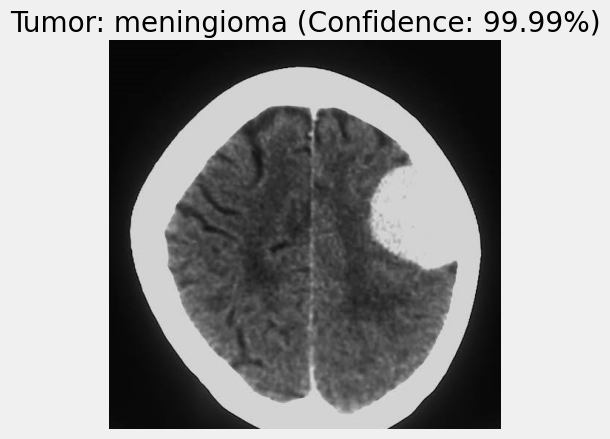

In [ ]:
image_path = '/content/drive/My Drive/Colab Notebooks/testing/meningioma/Te-meTr_0009.jpg'
predict(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


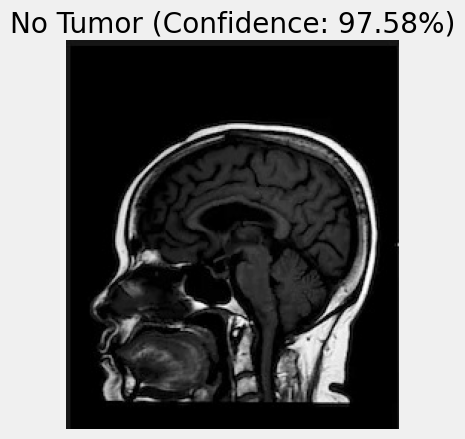

In [ ]:
image_path = '/content/drive/My Drive/Colab Notebooks/testing/notumor/Te-noTr_0004.jpg'
predict(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


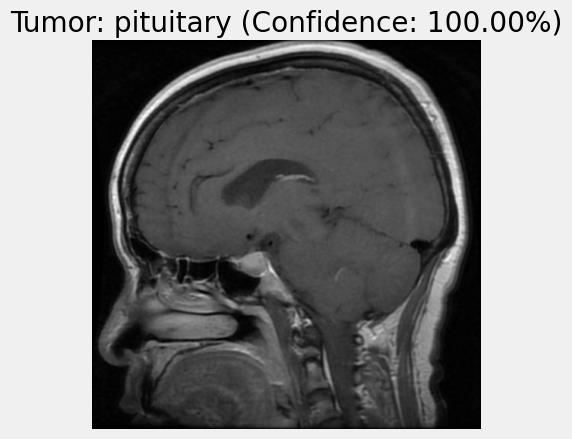

In [ ]:
image_path = '/content/drive/My Drive/Colab Notebooks/testing/pituitary/Te-piTr_0003.jpg'
predict(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


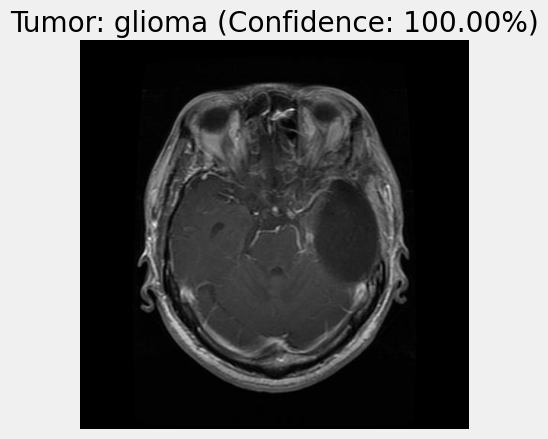

In [ ]:
image_path = '/content/drive/My Drive/Colab Notebooks/testing/glioma/Te-gl_0015.jpg'
predict(image_path)